In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('/kaggle/input/spam-emails/spam.csv')
df = pd.DataFrame(data)
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [3]:
df.isnull().sum()

Category    0
Message     0
dtype: int64

In [4]:
df.columns = ['label', 'text']
df.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
df['label'] = df['label'].map({'ham': 0, 'spam': 1})
df.head()

,label,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['label'], test_size = 0.2, random_state = 42)

vectorizer = CountVectorizer()
X_trainvec = vectorizer.fit_transform(X_train)
X_testvec = vectorizer.transform(X_test)

In [7]:
model = MultinomialNB()
model.fit(X_trainvec, y_train)

trainpred = model.predict(X_trainvec)
print("Accuracy of train data:", accuracy_score(y_train, trainpred))

Accuracy of train data: 0.9932690150325331


In [8]:
testpred = model.predict(X_testvec)
print("Accuracy of test data:", accuracy_score(y_test, testpred))

Accuracy of test data: 0.9919282511210762


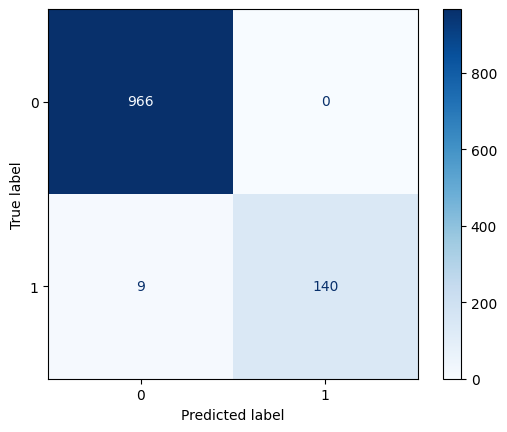

In [9]:
cm = confusion_matrix(y_test, testpred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap="Blues")